In [453]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

students = pd.read_csv('stud_math.csv')

sns.set()

#Функция отображения информации числового столбца
def print_num_column_info(column):
    print_column_common_info(column)
    
    f, axes = plt.subplots(1,2, figsize=(14,7), sharex = True)
    #sns.distplot(students[column],label = 'All data', ax=axes[0])
    axes[0].hist(students[column])
    axes[0].set_title('All data')
    iqr15(column, axes)
    
#Функция отображения гистограммы и данных о межквартильных расстояниях и выбросах для числовых полей
def iqr15(column, axes):
    median = students[column].median()
    perc25 = students[column].quantile(0.25)
    perc75 = students[column].quantile(0.75)
    IQR = perc75 - perc25
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    #sns.distplot(students[column].loc[students[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)],label = 'IQR', color="red", ax=axes[1])
    axes[1].hist(students[column].loc[students[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)])
    axes[1].set_title('IQR')
    

#Функция удаления пустых значений
def remove_nan_values(column):
    return students.loc[~pd.isna(students[column])]


#Функция отображения общей для числовых и строковых полей
def print_column_common_info(column):
    print('Уникальные значения:', students[column].unique())
    print('Количество уникальных значений:', students[column].nunique())
    display(students[column].describe())
    

#Функция отображения информации строкового столбца
def print_str_column_info(column):
    print_column_common_info(column)
    students[column].hist()
    

#Функция удаления выбросов
def remove_outliers(column):
    perc25 = students[column].quantile(0.25)
    perc75 = students[column].quantile(0.75)
    IQR15 = (perc75 - perc25) * 1.5
    return students.loc[students[column].between(perc25 - IQR15, perc75 + IQR15)]


#Функция отображения боксплота
def show_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
    
#Функция отображения статистически значимых столбцов   
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break    

In [454]:
display(students.head(10))
students.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Уникальные значения: ['GP' 'MS']
Количество уникальных значений: 2


count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

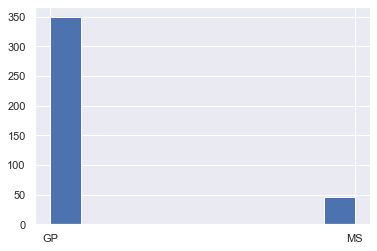

In [455]:
print_str_column_info('school')
#Большинство учеников учится в школе GP
#Пустых значений нет

Уникальные значения: ['F' 'M']
Количество уникальных значений: 2


count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

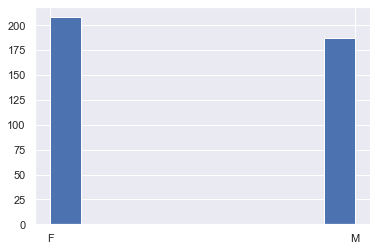

In [456]:
print_str_column_info('sex')
#В выборке больше учеников женского пола, чем мужского
#Пустых значений нет

Уникальные значения: [18 17 15 16 19 22 20 21]
Количество уникальных значений: 8


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


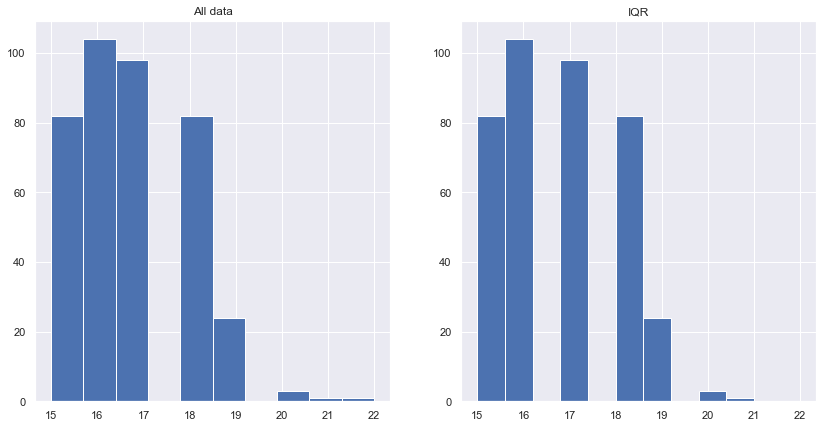

In [457]:
print_num_column_info('age')
#Есть несколько выбросов, а именно студенты с возрастом 22 года
#Пустых значений нет

Уникальные значения: ['U' nan 'R']
Количество уникальных значений: 2


count     378
unique      2
top         U
freq      295
Name: address, dtype: object

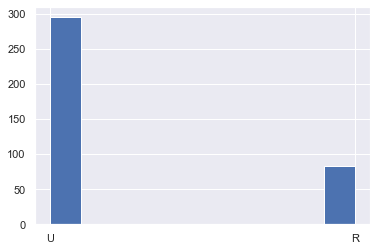

In [458]:
print_str_column_info('address')
#Большинство студентов живет в городе
#Есть 17 пустых значений, восстановить которые невозможно

Уникальные значения: [nan 'GT3' 'LE3']
Количество уникальных значений: 2


count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

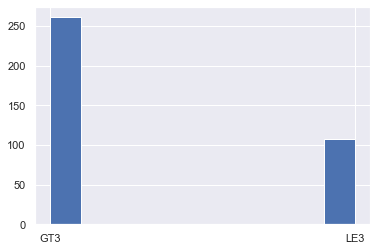

In [459]:
print_str_column_info('famsize')
#Большинство студентов живет в семье > 3 человек
#Есть 27 пустых значений, восстановить которые невозможно

Уникальные значения: ['A' nan 'T']
Количество уникальных значений: 2


count     350
unique      2
top         T
freq      314
Name: Pstatus, dtype: object

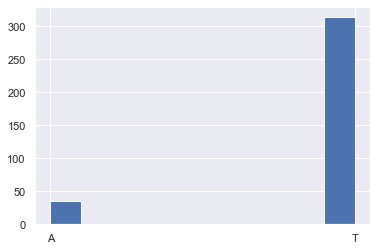

In [460]:
print_str_column_info('Pstatus')
#Большинство родителей студентов живут вместе
#Есть 45 пустых значений, восстановить которые невозможно

Уникальные значения: [ 4.  1.  3.  2. nan  0.]
Количество уникальных значений: 5


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


C:\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


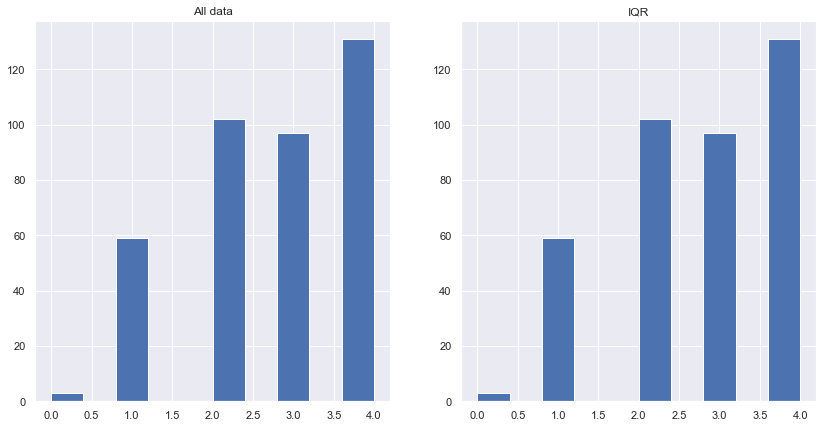

In [461]:
print_num_column_info('Medu')
#половина матерей имеет высшее или среднее специальное образование, при этом преобладает высшее образование
#выбросов нет, но есть пустые значения

Уникальные значения: [ 4.  1.  2.  3. 40. nan  0.]
Количество уникальных значений: 6


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


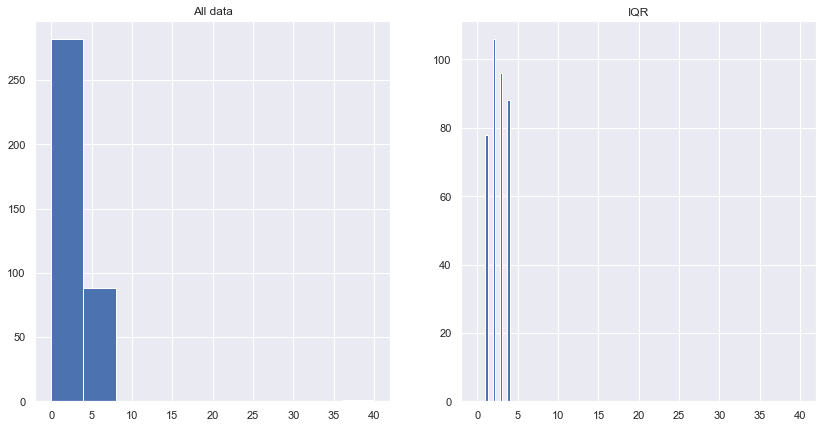

In [462]:
print_num_column_info('Fedu')
#В данных об образовании отца есть некорректные данные, а именно значение 40
#Также есть пустые данные

In [463]:
#Удаляем из датафрейма неверные данные
students = students.loc[~(students.Fedu > 4)]

Уникальные значения: [ 4.  1.  2.  3. nan  0.]
Количество уникальных значений: 5


count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


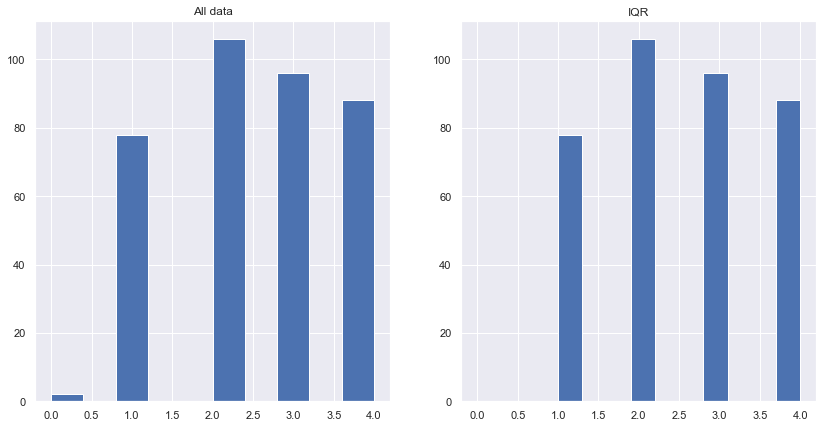

In [464]:
print_num_column_info('Fedu')
#Исходя из данных, мы можем сказать, что в целом матери имеют лучшее образование, чем отцы
#Исходя из межквартильного расстояния, в данных есть выбросы

Уникальные значения: ['at_home' 'health' 'other' 'services' 'teacher' nan]
Количество уникальных значений: 5


count       375
unique        5
top       other
freq        133
Name: Mjob, dtype: object

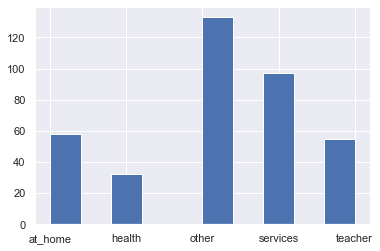

In [465]:
print_str_column_info('Mjob')
#В данных есть пустые значения, восстановить которые невозможно

Уникальные значения: ['teacher' 'other' nan 'health' 'services' 'at_home']
Количество уникальных значений: 5


count       358
unique        5
top       other
freq        196
Name: Fjob, dtype: object

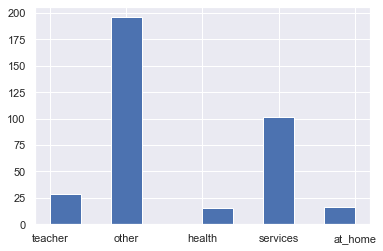

In [466]:
print_str_column_info('Fjob')
#В данных есть пустые значения, восстановить которые невозможно

Уникальные значения: ['course' 'other' 'home' 'reputation' nan]
Количество уникальных значений: 4


count        377
unique         4
top       course
freq         137
Name: reason, dtype: object

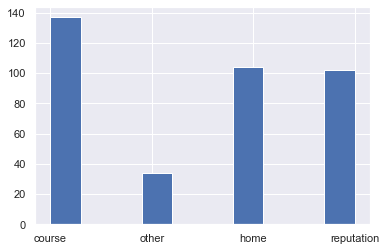

In [467]:
print_str_column_info('reason')
#Большинство студентов выбрали школу на основании ее образовательной программы
#В данных есть пустые значения, восстановить которые невозможно

Уникальные значения: ['mother' 'father' 'other' nan]
Количество уникальных значений: 3


count        363
unique         3
top       mother
freq         250
Name: guardian, dtype: object

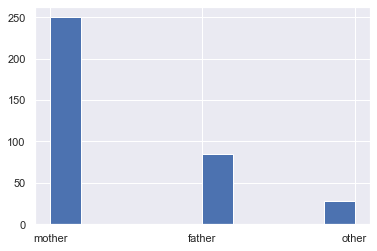

In [468]:
print_str_column_info('guardian')
#У большинства студентов опекуном является мать
#В данных есть пустые значения, восстановить которые невозможно

Уникальные значения: [ 2.  1.  3. nan  4.]
Количество уникальных значений: 4


count    366.000000
mean       1.434426
std        0.690297
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


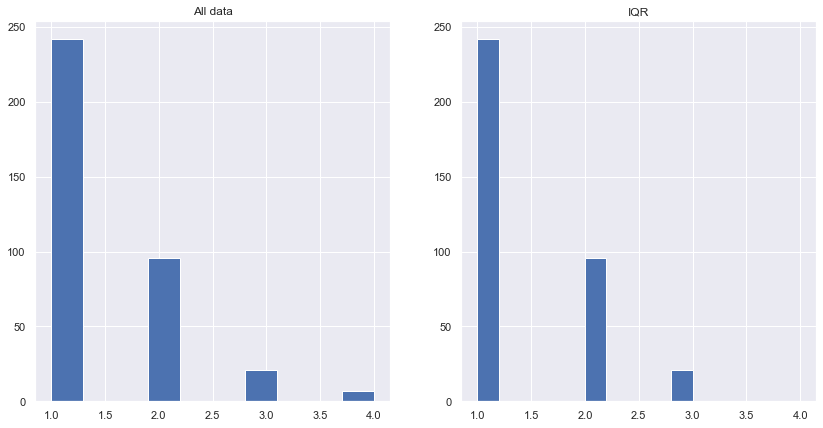

In [469]:
print_num_column_info('traveltime')
#Исходя из данных, мы можем сказать, что половина студентов добирается до школы меньше, чем за 15 минут
#Исходя из межквартильного расстояния, в данных есть выбросы
# данных есть пустые значения, восстановить которые невозможно

Уникальные значения: [ 2.  3.  1. nan  4.]
Количество уникальных значений: 4


count    387.000000
mean       2.036176
std        0.841744
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


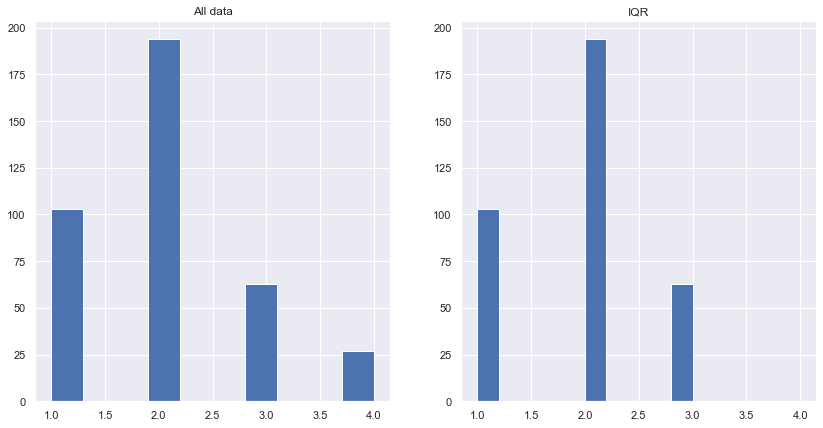

In [470]:
print_num_column_info('studytime')
#В среднем студенты тратят дополнительно 2-2,5 часа в неделю на учебу помимо занятий в школе
#Исходя из межквартильного расстояния, в данных есть выбросы:
#студенты, которые имеют больше 10 еженедельных часов дополнительных занятий
#В данных есть пустые значения, восстановить которые невозможно

Уникальные значения: [ 0.  3. nan  2.  1.]
Количество уникальных значений: 4


count    372.000000
mean       0.338710
std        0.743929
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


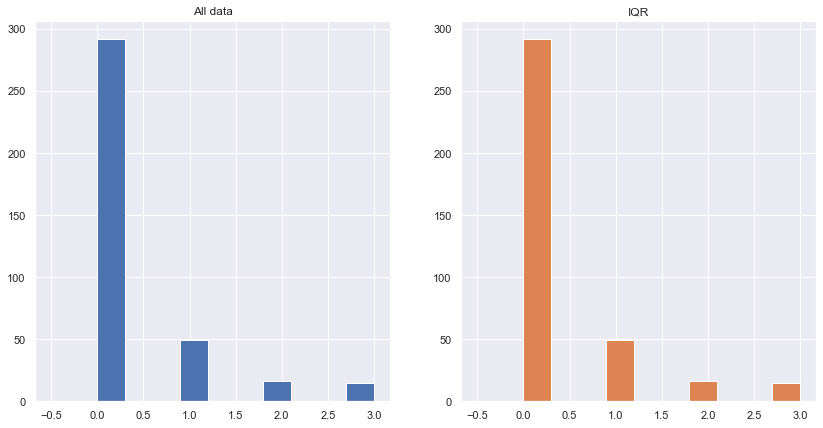

In [471]:
print_num_column_info('failures')
students.failures.hist()

#Большинство учеников не имеют внеучебных неудач
#Исходя из межквартильного расстояния, в данных есть выбросы:
#все ученики, которые имеют неудачи являются выбросами
#В данных есть пустые значения, восстановить которые невозможно

Уникальные значения: ['yes' 'no' nan]
Количество уникальных значений: 2


count     385
unique      2
top        no
freq      334
Name: schoolsup, dtype: object

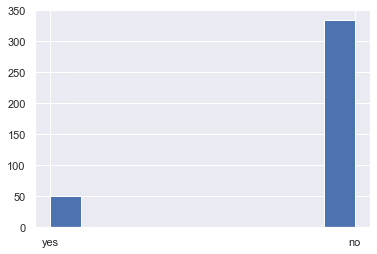

In [472]:
print_str_column_info('schoolsup')
#Большинство учеников не имеют дополнительной образовательной поддержки
#В данных есть пустые значения, восстановить которые невозможно

Уникальные значения: ['no' 'yes' nan]
Количество уникальных значений: 2


count     355
unique      2
top       yes
freq      218
Name: famsup, dtype: object

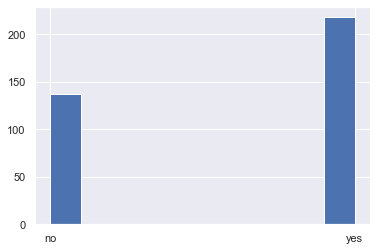

In [473]:
print_str_column_info('famsup')
#При этом большинство учеников имеют семейную образовательную поддержку
#В данных есть пустые значения, восстановить которые невозможно

Уникальные значения: ['no' nan 'yes']
Количество уникальных значений: 2


count     354
unique      2
top        no
freq      199
Name: paid, dtype: object

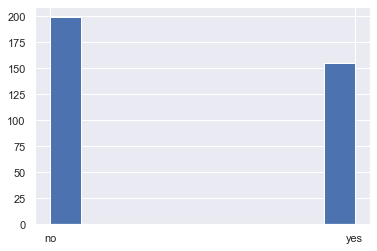

In [474]:
print_str_column_info('paid')
#Дополнительных платных занятий по математике не имеет больше половины учеников
#В данных есть пустые значения, восстановить которые невозможно

Уникальные значения: ['no' 'yes' nan]
Количество уникальных значений: 2


count     380
unique      2
top       yes
freq      194
Name: activities, dtype: object

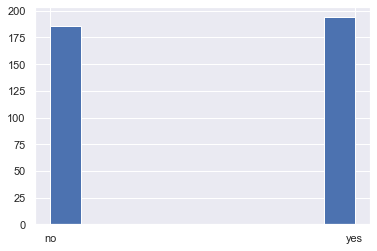

In [475]:
print_str_column_info('activities')
#Ровно половина учеников ходит на дополнительные внеучебные занятия
#В данных есть пустые значения, восстановить которые невозможно

Уникальные значения: ['yes' 'no' nan]
Количество уникальных значений: 2


count     378
unique      2
top       yes
freq      299
Name: nursery, dtype: object

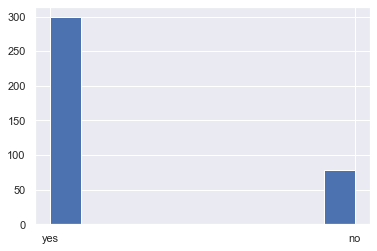

In [476]:
print_str_column_info('nursery')
#Большинство учеников посещало детский сад
#В данных есть пустые значения, восстановить которые невозможно

Уникальные значения: ['yes' nan 'no']
Количество уникальных значений: 2


count     374
unique      2
top       yes
freq      355
Name: higher, dtype: object

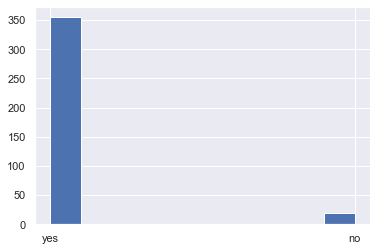

In [477]:
print_str_column_info('higher')
#Подавляющее большинство учеников хочет получить высшее образование
#В данных есть пустые значения, восстановить которые невозможно

Уникальные значения: [nan 'yes' 'no']
Количество уникальных значений: 2


count     360
unique      2
top       yes
freq      304
Name: internet, dtype: object

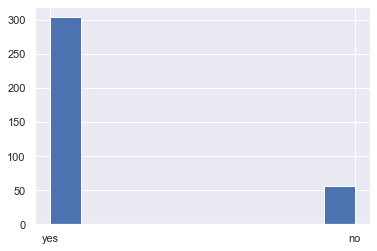

In [478]:
print_str_column_info('internet')
#У большинства учеников есть дома интернет
#В данных есть пустые значения, восстановить которые невозможно

Уникальные значения: ['no' nan 'yes']
Количество уникальных значений: 2


count     363
unique      2
top        no
freq      239
Name: romantic, dtype: object

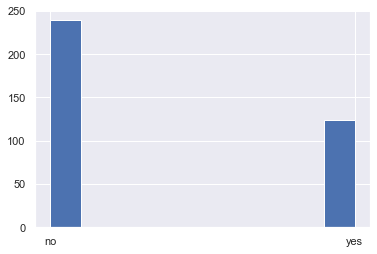

In [479]:
print_str_column_info('romantic')
#2/3 учеников не состоят в романтических отношениях
#В данных есть пустые значения, восстановить которые невозможно

Уникальные значения: [ 4.  5.  3. nan -1.  2.  1.]
Количество уникальных значений: 6


count    367.000000
mean       3.934605
std        0.926876
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


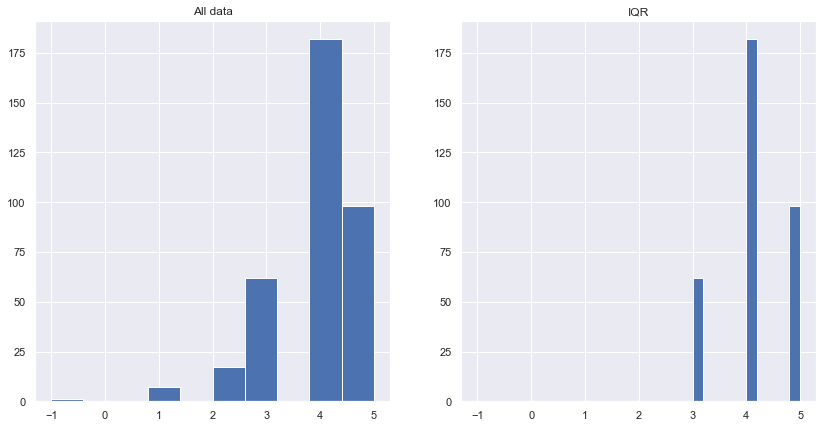

In [480]:
print_num_column_info('famrel')
#В целом семейные отношения у учеников хорошие либо очень хорошие
#Исходя из межквартильного расстояния, в данных есть выбросы:
#ученики, у которых отношения в семье плохие
#В данных есть пустые значения, восстановить которые невозможно

Уникальные значения: [ 3.  2.  4.  1.  5. nan]
Количество уникальных значений: 5


count    383.000000
mean       3.234987
std        0.993238
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


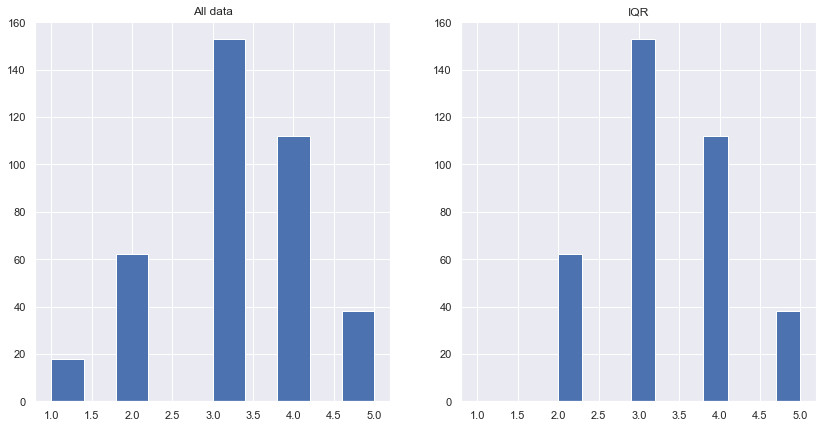

In [481]:
print_num_column_info('freetime')
#у большинства учеников достаточно свободного времени. Выбросами являются данные учеников, у которых очень мало времени
#могу предположить, что это те же ученики, которые занимаются больше 10 часов в неделю в качестве доп занятий
#в данных есть пустые значения

Уникальные значения: [ 4.  3.  2.  1.  5. nan]
Количество уникальных значений: 5


count    386.000000
mean       3.108808
std        1.115918
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


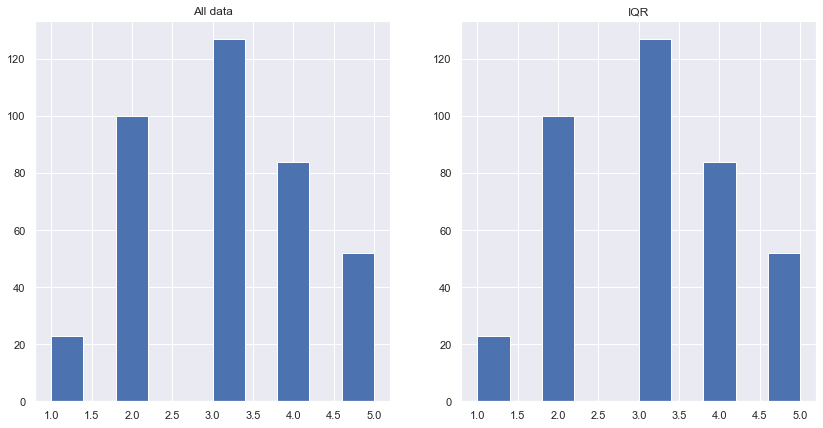

In [482]:
print_num_column_info('goout')
#Половина учеников проводит достаточно времени с друзьями
#Выбросов нет
#в данных есть пустые значения

Уникальные значения: [ 3.  5.  1.  2.  4. nan]
Количество уникальных значений: 5


count    379.000000
mean       3.530343
std        1.397656
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


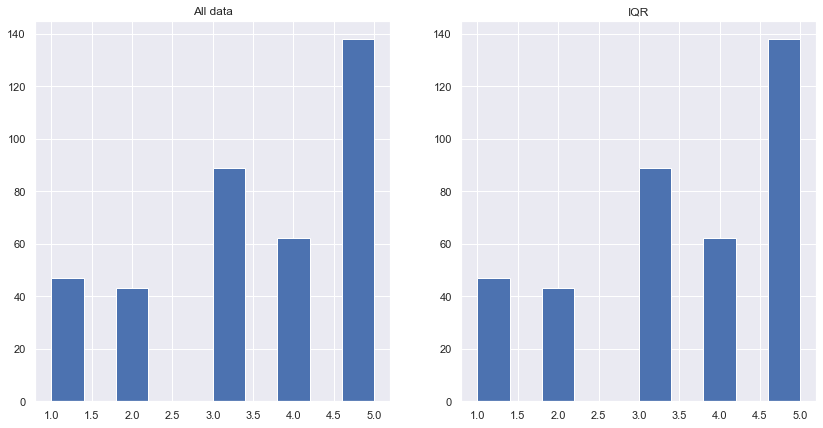

In [483]:
print_num_column_info('health')
#У большинства учеников хорошее или очень хорошее здоровье
#Выбросов нет
#в данных есть пустые значения

Уникальные значения: [  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]
Количество уникальных значений: 36


count    382.000000
mean       7.287958
std       23.495369
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


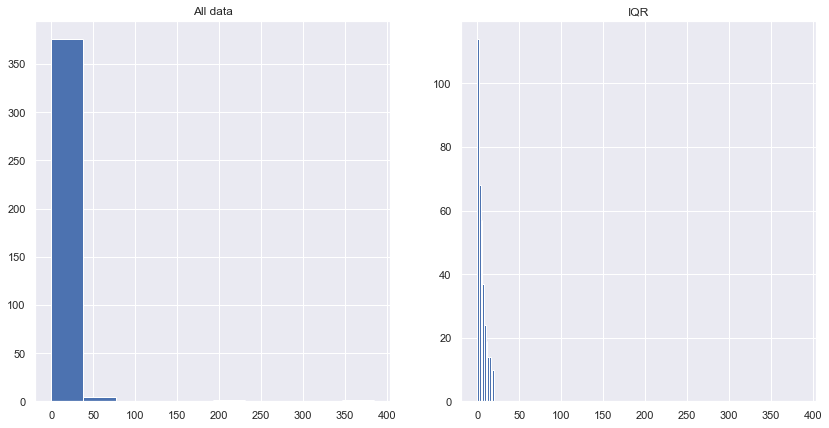

In [484]:
print_num_column_info('absences')
#Половина учеников имеют 4-8 пропусков
#Есть сильный выброс, я предполагаю, что это ученики, у которых слабое здоровье
#в данных есть пустые значения

Уникальные значения: [ 30.  50.  75.  55.  95.  45.  70.  80.  25.  60.  40.  85.  90.  65.
 100.  35.   0.  nan  20.]
Количество уникальных значений: 18


count    388.000000
mean      52.242268
std       22.945235
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


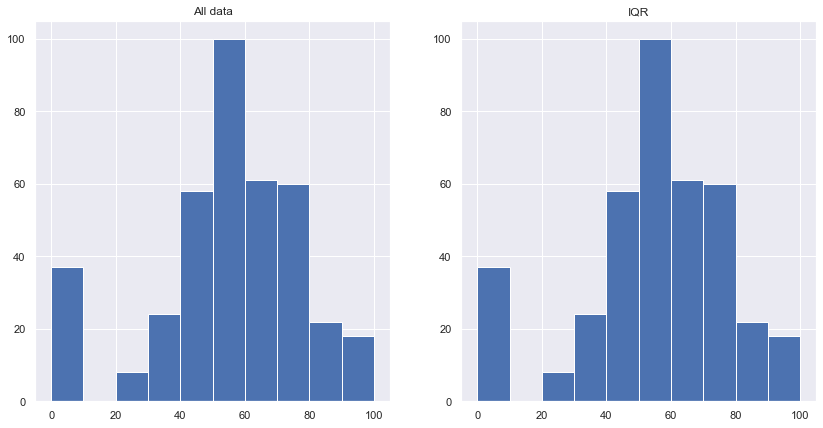

In [485]:
print_num_column_info('score')
#Половина учеников имеют более 55 баллов
#Выбросов нет
#в данных есть пустые значения

In [486]:
#Удаляем выбросы в числовых полях
for column in students.dtypes[students.dtypes.values == 'float64'].index:
    students = remove_outliers(column)
    
for column in students.dtypes[students.dtypes.values == 'int64'].index:
    students = remove_outliers(column)    

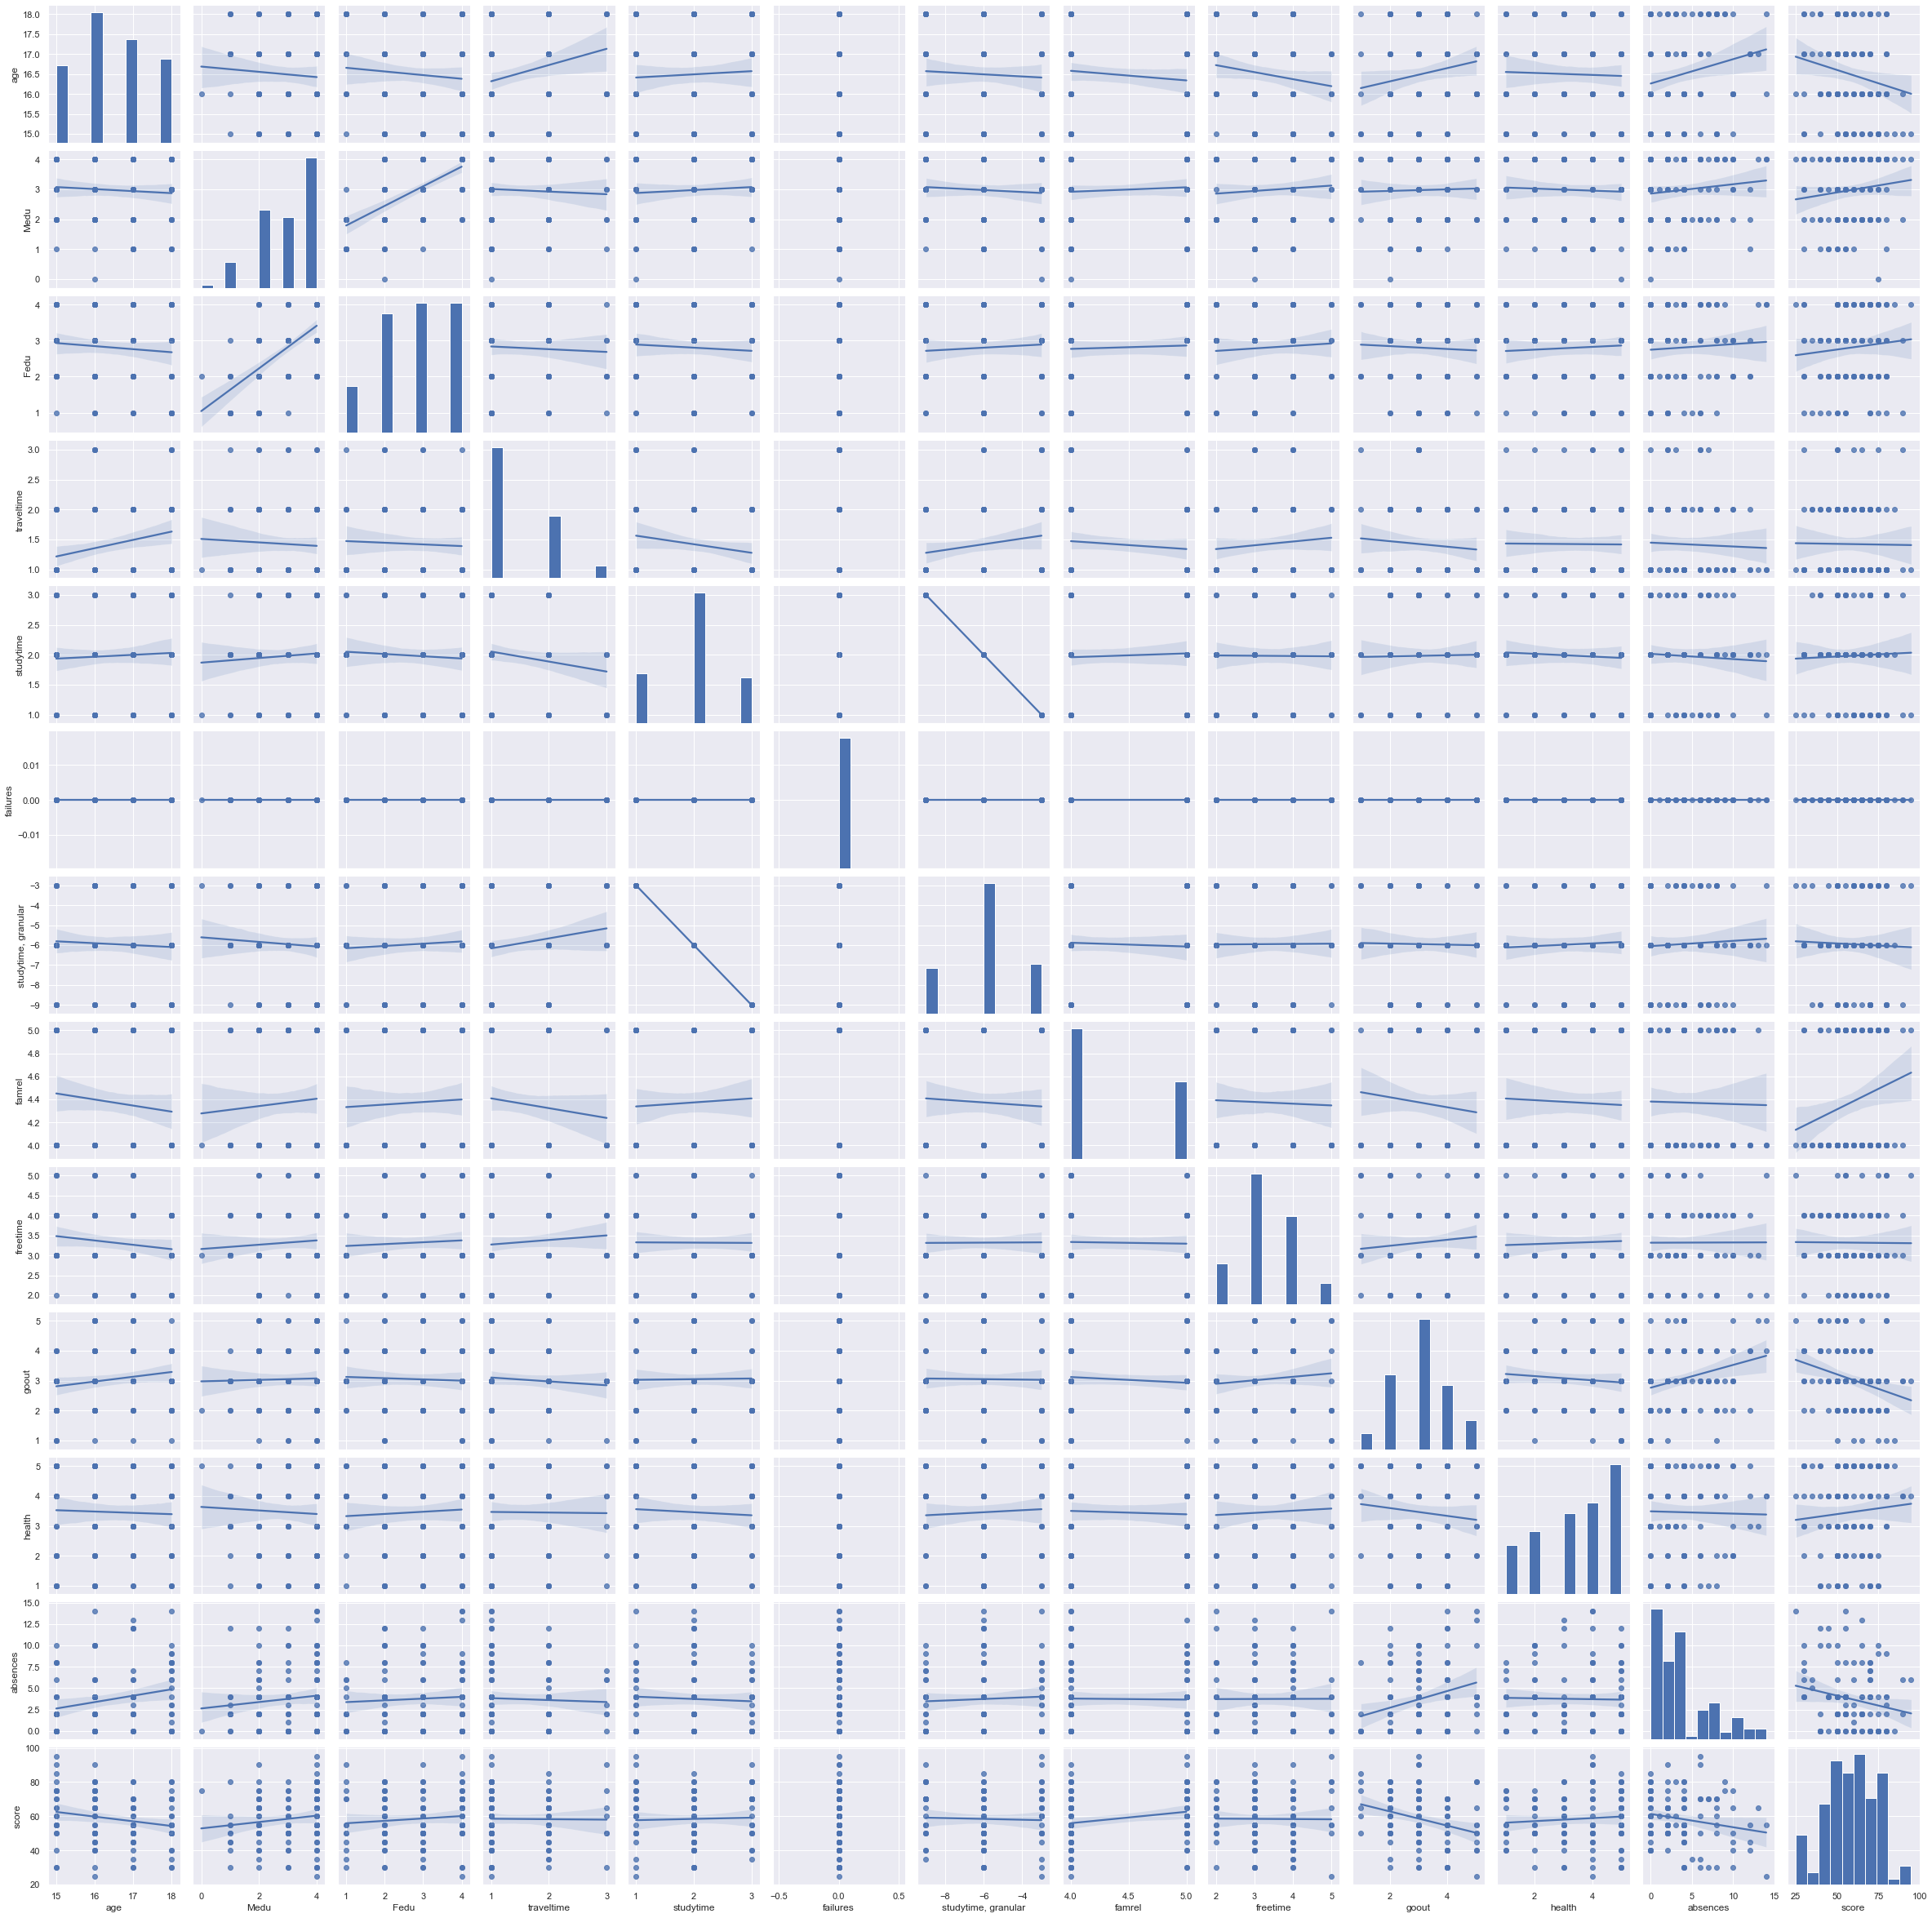

In [487]:
#Ищем корреляции на графиках
sns.pairplot(students, kind = 'reg')

In [488]:
students.corr()
#Обнаружена обратная корреляция между столбцами studytime и studytime, granular
#Так как мы вообще не рассматриваем второй столбец и есть точная корреляция с первым столбцом, то второй можно удалить

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.067026,-0.088445,0.237708,0.050300,NaN,-0.050300,-0.112620,-0.138461,0.163602,-0.033110,0.214167,-0.190903
Medu,-0.067026,1.000000,0.623475,-0.050190,0.061663,NaN,-0.061663,0.069054,0.069573,0.025378,-0.044953,0.108100,0.131540
Fedu,-0.088445,0.623475,1.000000,-0.046075,-0.057533,NaN,0.057533,0.045436,0.056801,-0.040903,0.052855,0.056505,0.094399
traveltime,0.237708,-0.050190,-0.046075,1.000000,-0.154644,NaN,0.154644,-0.106022,0.084893,-0.077423,-0.009014,-0.038381,-0.011029
studytime,0.050300,0.061663,-0.057533,-0.154644,1.000000,NaN,-1.000000,0.047016,-0.005710,0.014246,-0.048139,-0.048714,0.032415
failures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"studytime, granular",-0.050300,-0.061663,0.057533,0.154644,-1.000000,NaN,1.000000,-0.047016,0.005710,-0.014246,0.048139,0.048714,-0.032415
famrel,-0.112620,0.069054,0.045436,-0.106022,0.047016,NaN,-0.047016,1.000000,-0.025247,-0.091131,-0.039947,-0.016676,0.217697
freetime,-0.138461,0.069573,0.056801,0.084893,-0.005710,NaN,0.005710,-0.025247,1.000000,0.093989,0.042575,0.002838,-0.007347
goout,0.163602,0.025378,-0.040903,-0.077423,0.014246,NaN,-0.014246,-0.091131,0.093989,1.000000,-0.096315,0.273602,-0.284396


In [489]:
students.drop(["studytime, granular"], axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,MS,M,18,R,GT3,T,2.0,1.0,other,other,other,mother,2.0,1.0,0.0,no,no,no,yes,no,yes,yes,yes,4.0,4.0,3.0,5.0,5.0,35.0
382,MS,M,17,U,GT3,T,2.0,3.0,other,services,NaN,father,2.0,2.0,0.0,no,no,no,yes,yes,NaN,yes,no,4.0,4.0,3.0,3.0,2.0,50.0
386,MS,F,18,R,GT3,T,4.0,4.0,teacher,at_home,reputation,mother,3.0,1.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,4.0,4.0,3.0,5.0,7.0,30.0
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0


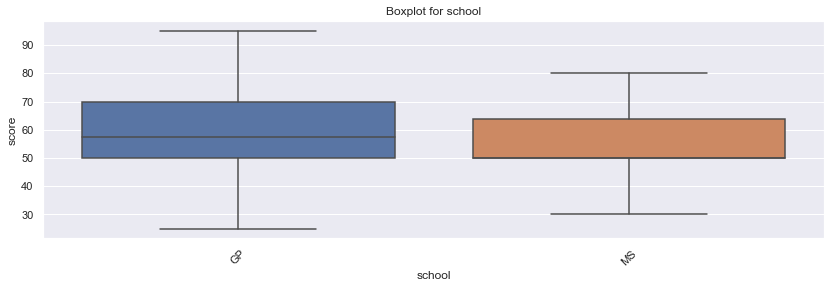

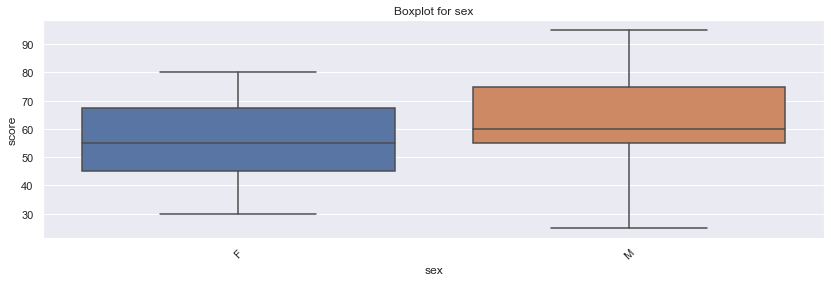

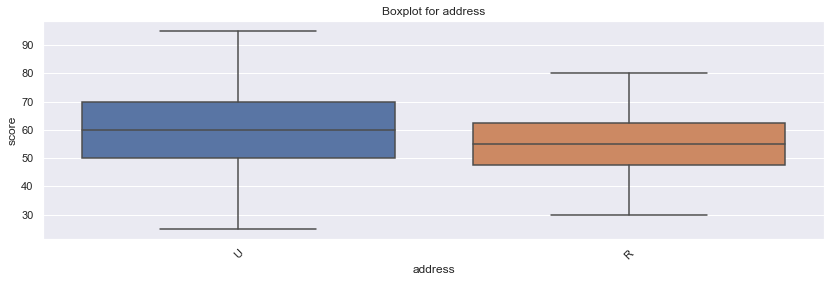

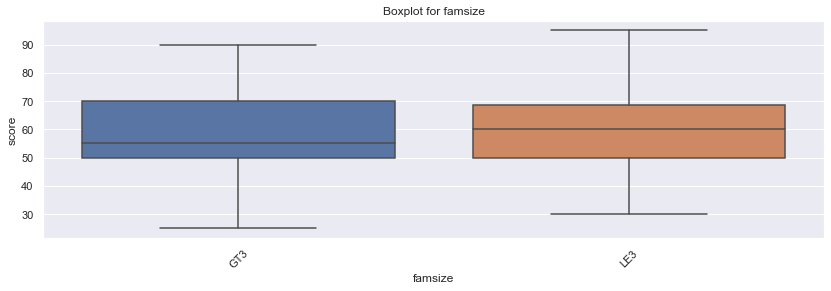

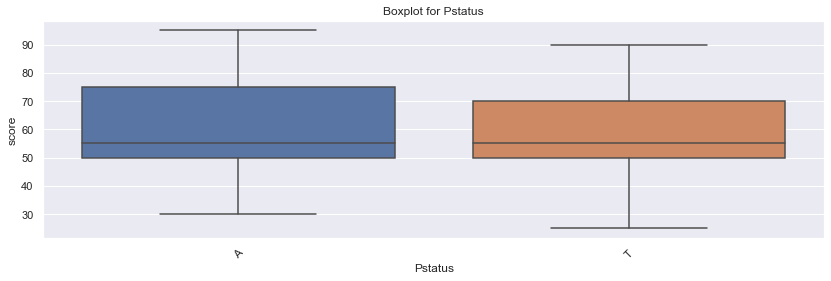

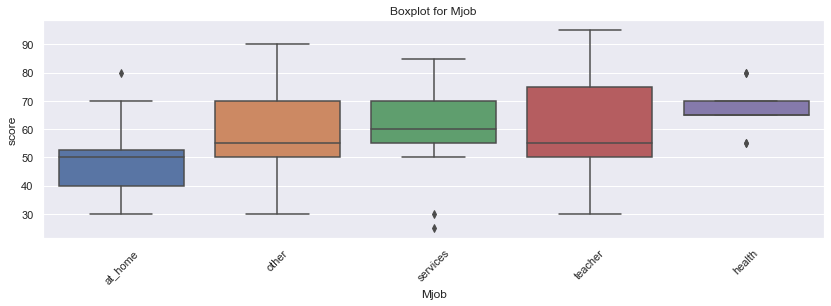

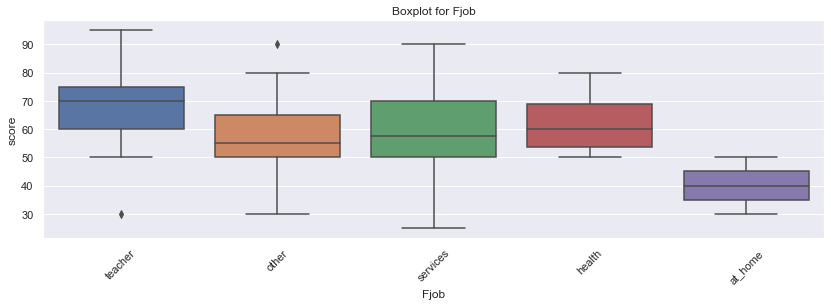

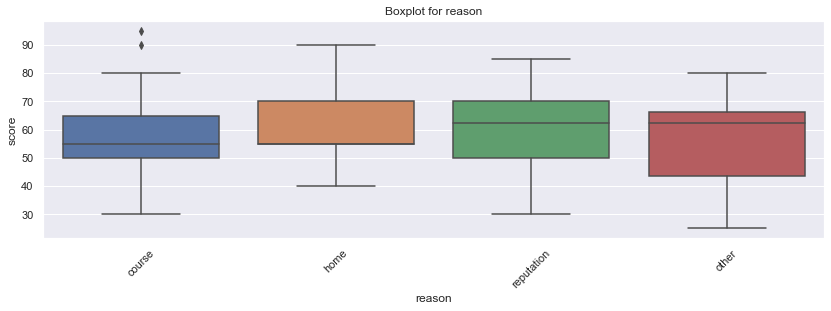

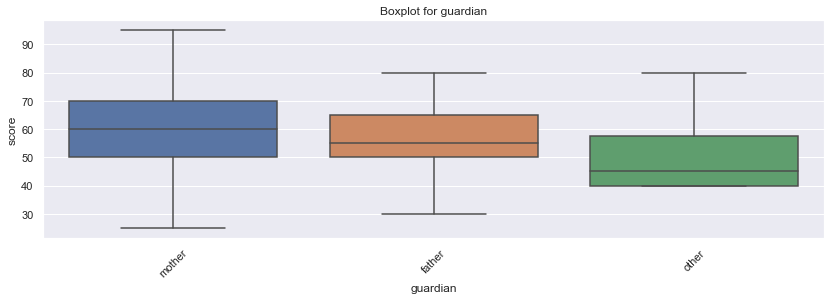

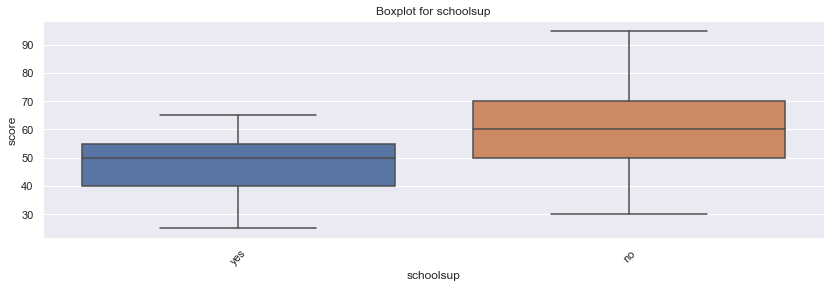

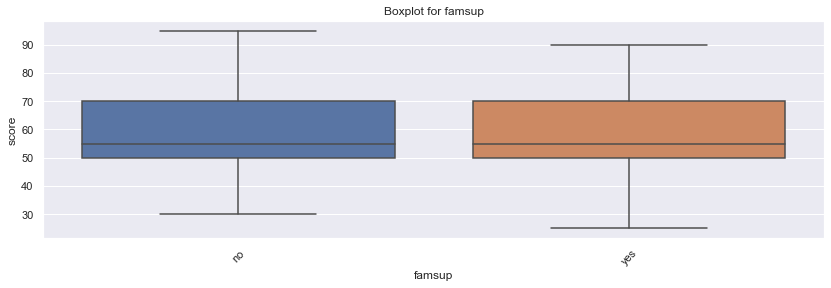

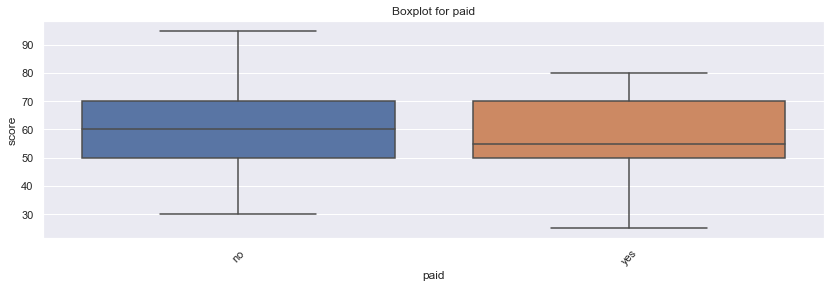

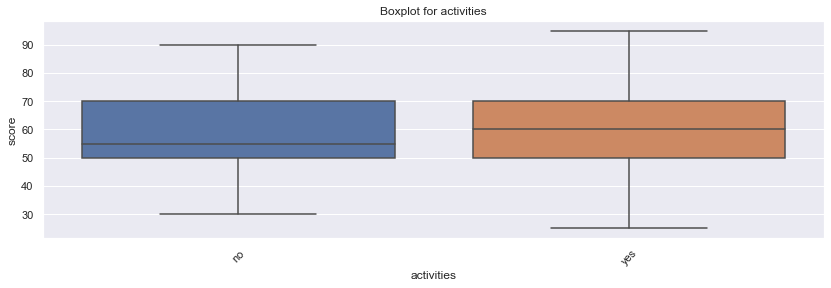

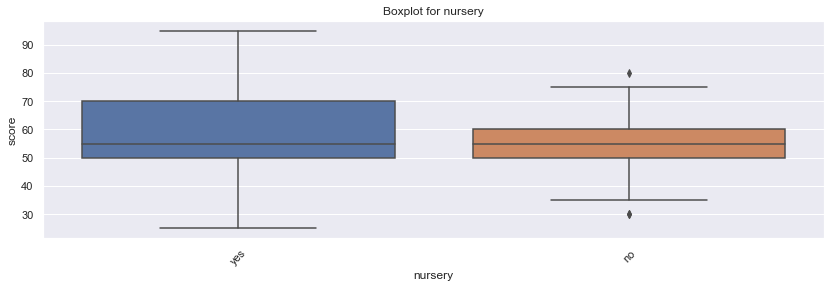

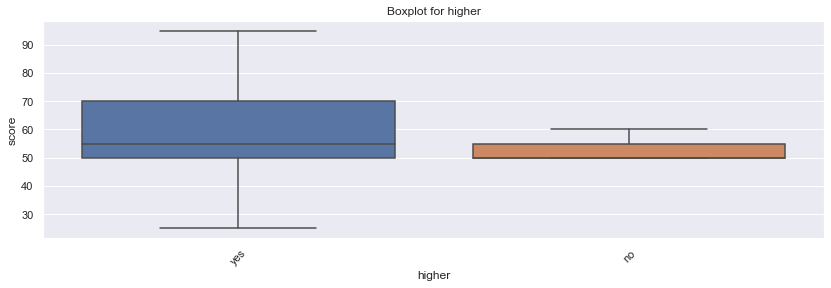

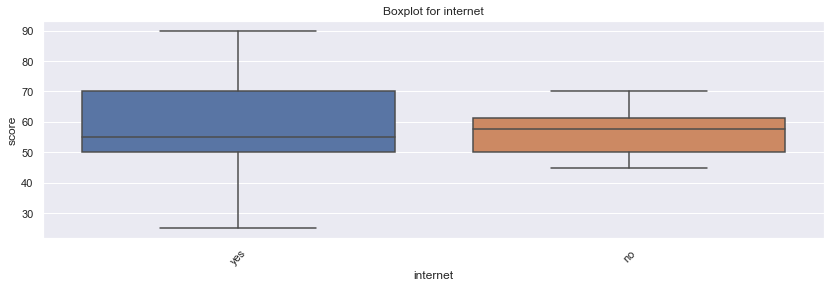

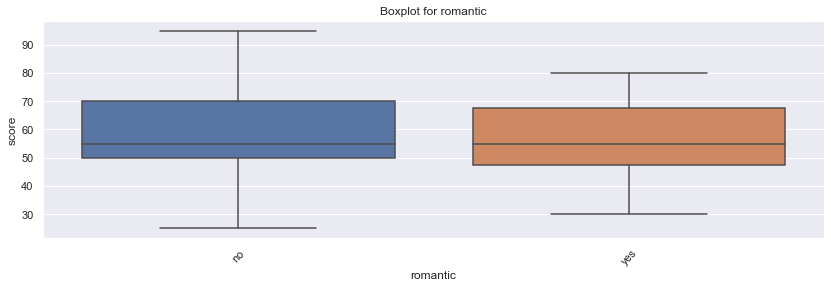

In [490]:
#строим боксплоты для всех номинальных столбцов
for column in students.dtypes[students.dtypes.values == 'object'].index:
    show_boxplot(column)

In [491]:
#Находим столбцы со стастистически значимыми различиями
for column in students.dtypes[students.dtypes.values == 'object'].index:
    get_stat_dif(column)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


## Выводы


1. В данных довольно много пустых значений, 3/4 строк содержат пустые значения
2. Выбросы найдены в 6 числовых столбцах 
3. Найдена отрицательная корреляция столбца studytime и studytime, granular. Столбец "studytime, granular" удален из рассмотрения. Также была отмечена положительная корреляция между образованием родителей, из чего можно сделать вывод, что чем выше образование у одного их родителей, тем выше она у другого
4. Среди номинальных параметров только статистически значимые различия имеют: Mjob, sex и schoolsup
5. Самые важные параметры, которые предлагается использовать для построения модели: 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'Mjob', 'sex', 'schoolsup'